In [1]:
#Observations
#1) Temperature does increase at the equator, but it is noticed, that is not exactly at the equator 
#but rather around the tropics, i.e., the areas that lie above and below the Equator. 
#Referred to this website for more information - https://www.scienceabc.com/eyeopeners/why-are-tropical-regions-hotter-than-equatorial-regions.html

#2) Humidity and Cloudiness has no co-relation with respect to Latitude.
#3) Wind speed appears to slightly increase as we move away from the equator.

In [2]:
import numpy as np
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Import API key
from api_keys import api_key


In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [4]:

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

In [21]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"
units="imperial"
rec_count = 0
request_count = 1
req_set = 1
# set up lists to hold reponse info
city_lat = []
city_lng = []
city_temp = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
skip_city = []
city_name = []
city_country = []
city_date = []

for cityname in cities:
    rec_count += 1
    #request_count += 1 
    
    # Build query URL
    #query_url = url + "appid=" + api_key + "&q=" + cityname
    query_url = f"{url}appid={api_key}&units={units}&q={cityname}"
    # Get weather data
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #print(json.dumps(weather_json, indent=2))
        city_country.append(weather_json["sys"]["country"])
        city_date.append(weather_json["dt"])
        city_name.append(weather_json["name"])
        city_lat.append(weather_json["coord"]["lat"])
        city_lng.append(weather_json["coord"]["lon"])
        city_temp.append(weather_json["main"]["temp_max"])
        city_humidity.append(weather_json["main"]["humidity"])
        city_cloudiness.append(weather_json["clouds"]["all"])
        city_windspeed.append(weather_json["wind"]["speed"])
        print(f"Processing Record: {rec_count}  of Set: {req_set} | City Name: {cityname}")
        if request_count>48:
               request_count = 1 
               req_set += 1
                # Wait a second in loop to not over exceed rate limit of API
               time.sleep(1.01)
        else:
              request_count += 1 
    except:
        print(f"City not found. Skipping Record {rec_count} ... {cityname}")
        skip_city.append(cityname)
print("-------------------------------")   
print("Data Retrieval Complete")
print("-------------------------------")

Processing Record: 1  of Set: 1 | City Name: ushuaia
Processing Record: 2  of Set: 1 | City Name: ostrovnoy
Processing Record: 3  of Set: 1 | City Name: rikitea
Processing Record: 4  of Set: 1 | City Name: qaanaaq
Processing Record: 5  of Set: 1 | City Name: albany
Processing Record: 6  of Set: 1 | City Name: hermanus
Processing Record: 7  of Set: 1 | City Name: vaini
Processing Record: 8  of Set: 1 | City Name: mahebourg
Processing Record: 9  of Set: 1 | City Name: bredasdorp
Processing Record: 10  of Set: 1 | City Name: kaeo
Processing Record: 11  of Set: 1 | City Name: cacapava do sul
Processing Record: 12  of Set: 1 | City Name: busselton
Processing Record: 13  of Set: 1 | City Name: mataura
Processing Record: 14  of Set: 1 | City Name: vestmanna
Processing Record: 15  of Set: 1 | City Name: dikson
City not found. Skipping Record 16 ... doctor pedro p. pena
Processing Record: 17  of Set: 1 | City Name: kruisfontein
Processing Record: 18  of Set: 1 | City Name: kaitangata
Processing

Processing Record: 150  of Set: 3 | City Name: laguna
Processing Record: 151  of Set: 3 | City Name: waitati
City not found. Skipping Record 152 ... makung
Processing Record: 153  of Set: 3 | City Name: santa cruz de la palma
Processing Record: 154  of Set: 3 | City Name: dingle
Processing Record: 155  of Set: 3 | City Name: grindavik
Processing Record: 156  of Set: 3 | City Name: kavieng
Processing Record: 157  of Set: 3 | City Name: muscat
Processing Record: 158  of Set: 3 | City Name: port macquarie
City not found. Skipping Record 159 ... umzimvubu
Processing Record: 160  of Set: 3 | City Name: airai
Processing Record: 161  of Set: 3 | City Name: katsuura
Processing Record: 162  of Set: 3 | City Name: vila velha
Processing Record: 163  of Set: 3 | City Name: karratha
Processing Record: 164  of Set: 3 | City Name: rawson
Processing Record: 165  of Set: 3 | City Name: mount kisco
Processing Record: 166  of Set: 3 | City Name: mar del plata
Processing Record: 167  of Set: 3 | City Name

Processing Record: 294  of Set: 6 | City Name: vardo
City not found. Skipping Record 295 ... geresk
Processing Record: 296  of Set: 6 | City Name: mareeba
Processing Record: 297  of Set: 6 | City Name: maslovare
Processing Record: 298  of Set: 6 | City Name: paamiut
Processing Record: 299  of Set: 6 | City Name: surt
City not found. Skipping Record 300 ... yershov
Processing Record: 301  of Set: 6 | City Name: szczytno
Processing Record: 302  of Set: 6 | City Name: augusto correa
Processing Record: 303  of Set: 6 | City Name: nemuro
Processing Record: 304  of Set: 6 | City Name: acapulco
Processing Record: 305  of Set: 6 | City Name: placido de castro
Processing Record: 306  of Set: 6 | City Name: dauphin
Processing Record: 307  of Set: 6 | City Name: marsh harbour
Processing Record: 308  of Set: 6 | City Name: hasaki
City not found. Skipping Record 309 ... gorkovskoye
Processing Record: 310  of Set: 6 | City Name: saint-augustin
City not found. Skipping Record 311 ... kolimvari
Proces

Processing Record: 441  of Set: 8 | City Name: kayerkan
Processing Record: 442  of Set: 8 | City Name: farsund
Processing Record: 443  of Set: 8 | City Name: peniche
City not found. Skipping Record 443 ... peniche
Processing Record: 444  of Set: 9 | City Name: cascais
Processing Record: 445  of Set: 9 | City Name: sorong
Processing Record: 446  of Set: 9 | City Name: madang
Processing Record: 447  of Set: 9 | City Name: petropavlovsk-kamchatskiy
Processing Record: 448  of Set: 9 | City Name: aswan
Processing Record: 449  of Set: 9 | City Name: cairns
Processing Record: 450  of Set: 9 | City Name: la libertad
Processing Record: 451  of Set: 9 | City Name: iracoubo
Processing Record: 452  of Set: 9 | City Name: manggar
Processing Record: 453  of Set: 9 | City Name: ondangwa
Processing Record: 454  of Set: 9 | City Name: narsaq
Processing Record: 455  of Set: 9 | City Name: iberia
Processing Record: 456  of Set: 9 | City Name: sao jose da coroa grande
Processing Record: 457  of Set: 9 | C

Processing Record: 586  of Set: 11 | City Name: jos
Processing Record: 587  of Set: 11 | City Name: durban
City not found. Skipping Record 588 ... bandar-e torkaman
Processing Record: 589  of Set: 11 | City Name: hengyang
Processing Record: 590  of Set: 11 | City Name: katherine
Processing Record: 591  of Set: 11 | City Name: ixtapa
Processing Record: 592  of Set: 11 | City Name: alexandria
City not found. Skipping Record 593 ... higuey
Processing Record: 594  of Set: 11 | City Name: ballina
Processing Record: 595  of Set: 11 | City Name: zhangye
Processing Record: 596  of Set: 11 | City Name: catalina
Processing Record: 597  of Set: 11 | City Name: morgan city
Processing Record: 598  of Set: 11 | City Name: dubrovytsya
City not found. Skipping Record 598 ... dubrovytsya
Processing Record: 599  of Set: 12 | City Name: esperance
Processing Record: 600  of Set: 12 | City Name: fairbanks
Processing Record: 601  of Set: 12 | City Name: ayan
Processing Record: 602  of Set: 12 | City Name: h

In [22]:
weather_df = pd.DataFrame({"City" : city_name,
                           "Cloudiness" : city_cloudiness,
                           "Country" : city_country,
                           "Date" : city_date,
                           "Humidity" : city_humidity,
                           "Lat" : city_lat,
                           "Lng" : city_lng,
                           "Max_Temp" : city_temp,
                           "Wind_Speed" : city_windspeed})
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Ushuaia,75,AR,1568173704,75,-54.81,-68.31,42.80,3.36
1,Ostrovnoy,13,RU,1568173705,88,68.05,39.51,48.30,15.75
2,Rikitea,49,PF,1568173705,81,-23.12,-134.97,72.24,17.34
3,Qaanaaq,0,GL,1568173705,58,77.48,-69.36,22.02,6.64
4,Albany,90,US,1568173705,82,42.65,-73.75,72.00,3.83


In [23]:
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat           565
Lng           565
Max_Temp      565
Wind_Speed    565
dtype: int64

In [24]:
weather_df["Date"] = pd.to_datetime(weather_df['Date'],unit='s').dt.date
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Ushuaia,75,AR,2019-09-11,75,-54.81,-68.31,42.80,3.36
1,Ostrovnoy,13,RU,2019-09-11,88,68.05,39.51,48.30,15.75
2,Rikitea,49,PF,2019-09-11,81,-23.12,-134.97,72.24,17.34
3,Qaanaaq,0,GL,2019-09-11,58,77.48,-69.36,22.02,6.64
4,Albany,90,US,2019-09-11,82,42.65,-73.75,72.00,3.83


In [25]:
# Finally, export this file to a spread so we can keep track of out new future watch list without the index
weather_df.to_csv("output/weather_data.csv", index=False)

In [26]:
weather_date = weather_df['Date'].values[0]
weather_date

datetime.date(2019, 9, 11)

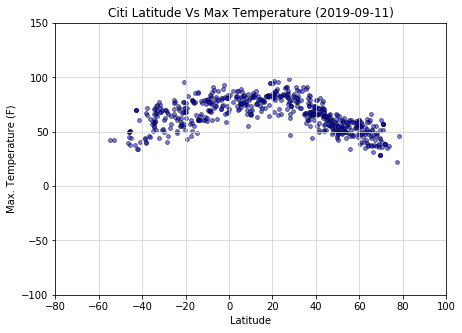

In [27]:
# Build a scatter plot for each data type
fig = plt.figure(figsize=(7,5))
 
plt.scatter(weather_df["Lat"], weather_df["Max_Temp"], facecolors="blue", edgecolors="black", marker="o", s=15, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"Citi Latitude Vs Max Temperature ({weather_date})")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-100,150)
#plt.grid(True)
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("images/CityLatitueVsMaxTemperature.png")
#fig.show()
# Show plot
plt.show()

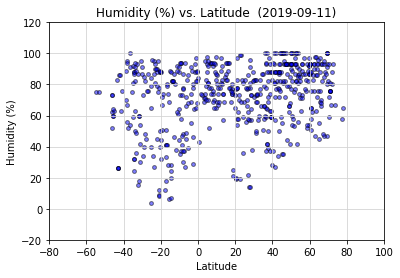

In [28]:
# Build a scatter plot for each data type
fig = plt.figure() 
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="blue", edgecolors="black", marker="o", s=15, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"Humidity (%) vs. Latitude  ({weather_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("images/Humidity(%)vs.Latitude.png")
#fig.show()
# Show plot
plt.show()

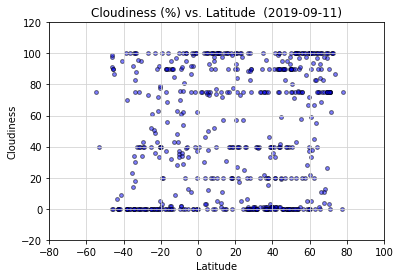

In [29]:
# Build a scatter plot for each data type
fig = plt.figure() 
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="blue", edgecolors="black", marker="o", s=15, alpha=0.5)

# Incorporate the other graph properties
plt.title(f"Cloudiness (%) vs. Latitude  ({weather_date})")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("images/Cloudiness.Vs.Latitude.png")
#fig.show()
# Show plot
plt.show()

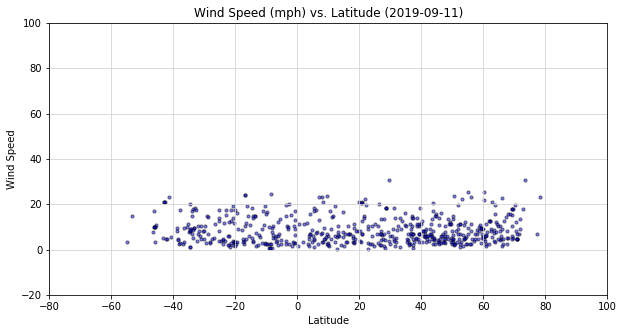

In [35]:
#fig = plt.figure() 
fig = plt.figure(figsize=(10,5))
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind_Speed"],facecolors="blue", edgecolors="black", marker="o", s=10, alpha=0.5)
# Incorporate the other graph properties
plt.title(f"Wind Speed (mph) vs. Latitude ({weather_date})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.xlim(-80,100)
plt.ylim(-20,100)
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#fig.show()
# Save the figure
plt.savefig("images/WindSpeed(mph)vs.Latitude.png")

# Show plot
plt.show()